En este trabajo se realizará una red neuronal convolucional para identificar ropa del dataset fashion MNIST. Se utilizará la librería Keras para la creación de la red neuronal.

Se importan las librerías necesarias para el trabajo.

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

print(tf.__version__)



2.10.0


In [42]:
#Revisar que se esté utilizando la GPU
print("GPU Available: ", tf.test.is_gpu_available())


GPU Available:  True


Se importa el dataset fashion MNIST de Keras.

In [43]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Se crean los nombres de las clases

In [44]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Exploración de los datos

In [45]:
train_images.shape

(60000, 28, 28)

Se tienen 60000 imágenes de entrenamiento, con un tamaño de 28x28 píxeles.

In [46]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Se tienen 10 clases distintas, del 0 al 9.

In [47]:
test_images.shape

(10000, 28, 28)

Se tienen 10000 imágenes de prueba, con un tamaño de 28x28 píxeles.

Para un mejor funcionamiento de la red neuronal, se normalizan los datos de entrenamiento y prueba.

In [48]:
train_images = train_images / 255.0

test_images = test_images / 255.0

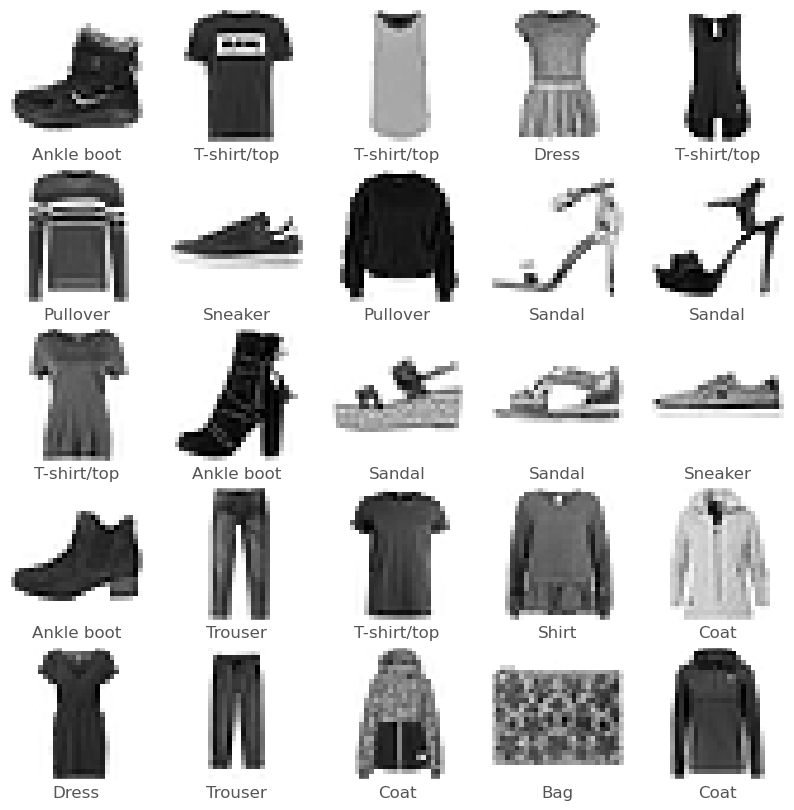

In [49]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Construyendo el modelo

In [50]:
# Modelo convolucional
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])

Se compila el modelo con la función de perdida, Crossentropy y el optimizador Adam.

In [51]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Se entrena el modelo con 10 épocas

In [52]:
n_epochs = 10

In [53]:
modelo = model.fit(train_images, train_labels, epochs=n_epochs, validation_data=(test_images, test_labels))

# Despliega las curvas de aprendizaje


Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.5111 - accuracy: 0.8131 - val_loss: 0.3741 - val_accuracy: 0.8655
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3316 - accuracy: 0.8787 - val_loss: 0.3344 - val_accuracy: 0.8769
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2821 - accuracy: 0.8960 - val_loss: 0.2974 - val_accuracy: 0.8953
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2531 - accuracy: 0.9061 - val_loss: 0.2942 - val_accuracy: 0.8938
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2258 - accuracy: 0.9164 - val_loss: 0.2811 - val_accuracy: 0.9011
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2063 - accuracy: 0.9232 - val_loss: 0.2603 - val_accuracy: 0.9086
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1875 - accuracy: 0.9303 - val_loss: 0.2789 - val_ac

Se evalúa el modelo con los datos de prueba

In [54]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.2866 - accuracy: 0.9062 - 1s/epoch - 4ms/step

Test accuracy: 0.9062000513076782


In [55]:
# Hacer predicciones
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)


313/313 [==============================] - 1s 2ms/step


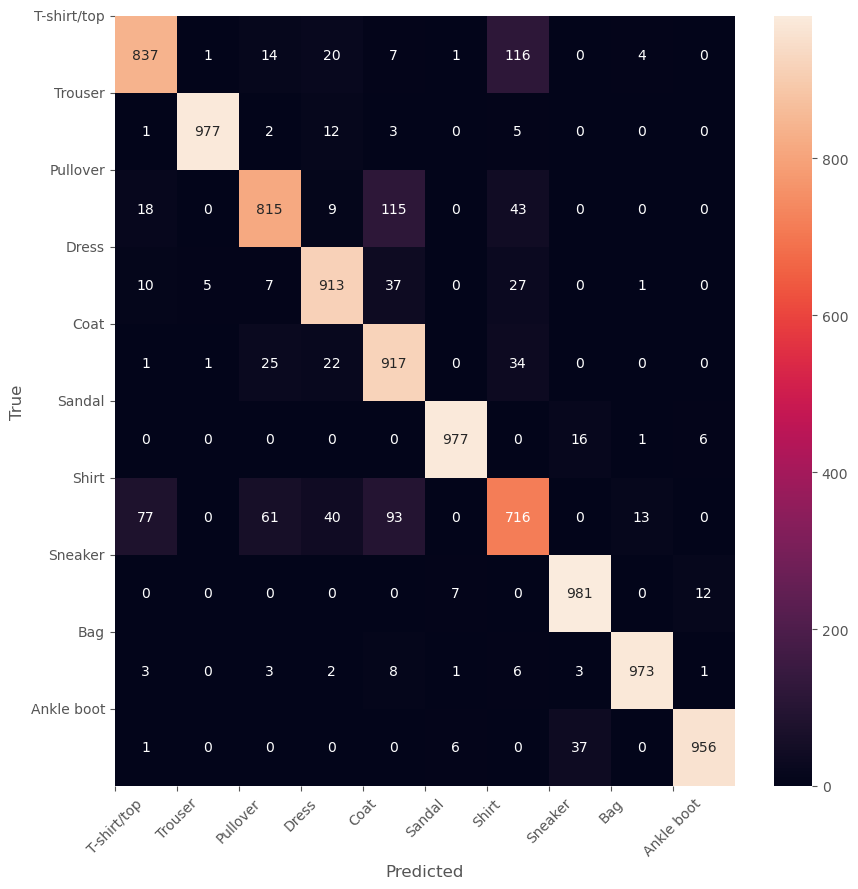

In [56]:
# Hacer tabla de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = np.argmax(predictions, axis=1)
cm = confusion_matrix(test_labels, y_pred)

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt="d")
# reemplazar los valores de 0 a 9 por los nombres de las clases
plt.xticks(np.arange(10), class_names, rotation=45)
plt.yticks(np.arange(10), class_names, rotation=0)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


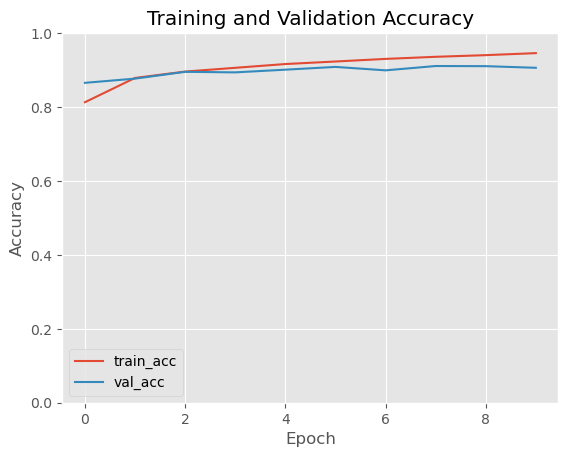

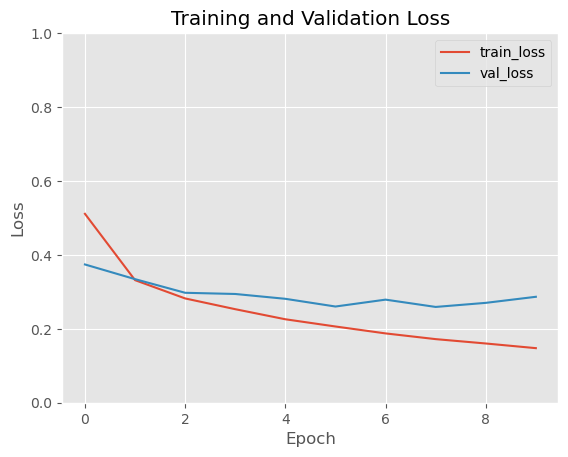

In [57]:
H = modelo
# Graficar el accuracy con el loss empezando en 0
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,n_epochs),H.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.legend()

plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["loss"],label="train_loss") 
plt.plot(np.arange(0,n_epochs),H.history["val_loss"],label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.ylim(0, 1)
plt.legend()

plt.show()

In [58]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

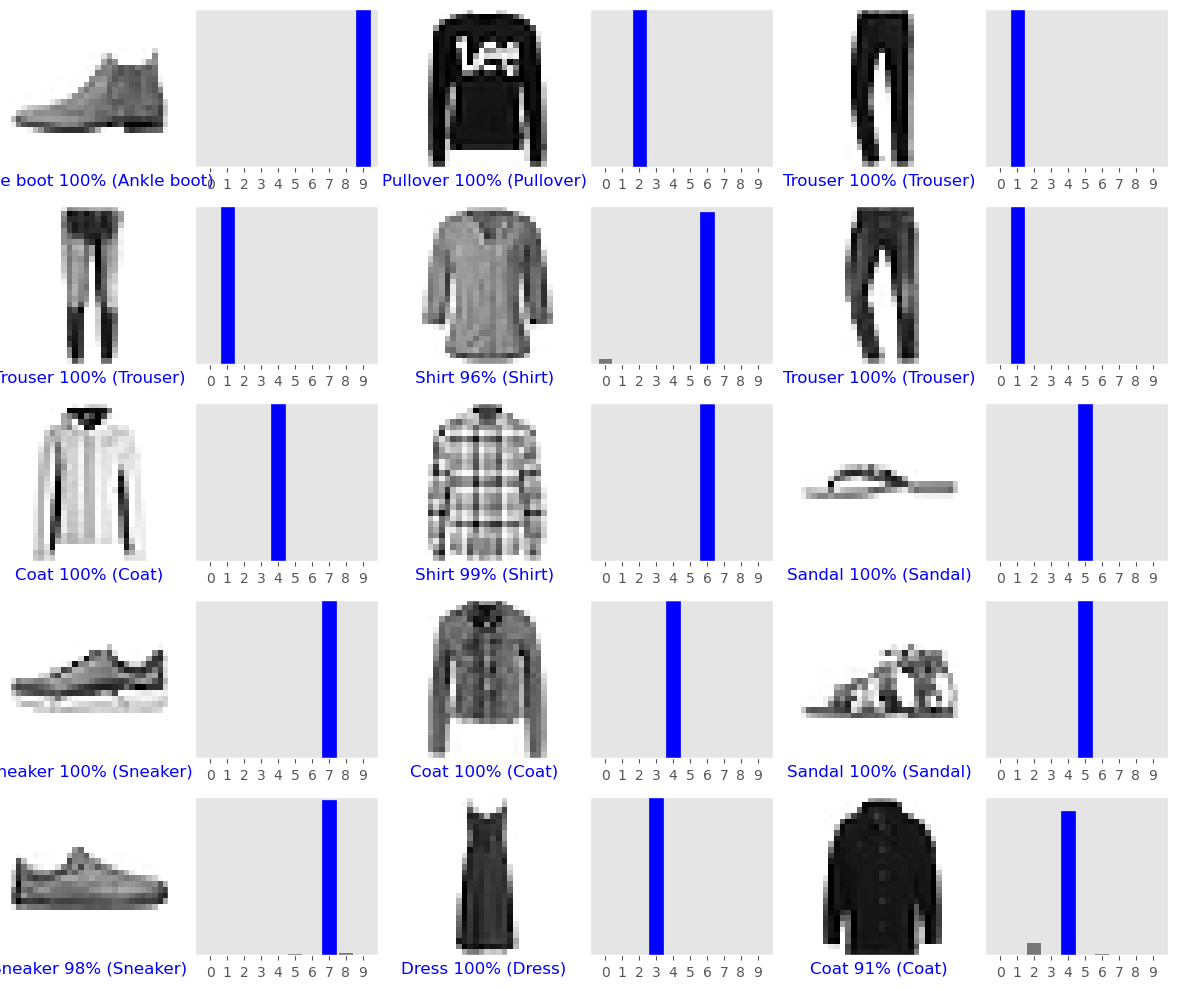

In [70]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [60]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              